# Exploratory Data Analysis (EDA)

## Import libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('../data/raw/data.csv')

# Display the first few rows of the DataFrame
display(df.head())

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## Overview of the Data

In [3]:
# Get the number of rows and columns
print("\nShape of the Data:")
print(df.shape)


Shape of the Data:
(95662, 16)


In [4]:
# Check duplicate values
print("Duplicate values:")
print(df.duplicated().sum())

Duplicate values:
0


In [5]:
# Check the data types of each column
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

None

### The overview of the data
- The dataset contains 95,662 rows and 16 columns.
- There are 1 float, 4 int and 11 object datatype columns.

## Summary Statistics

In [6]:
# Get summary statistics for numerical columns
display(df.describe())

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


## Distribution of Numerical Features

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


In [8]:
print("The count of unique values in the columns:")
print(df[numerical_cols].nunique())

The count of unique values in the columns:
CountryCode           1
Amount             1676
Value              1517
PricingStrategy       4
FraudResult           2
dtype: int64


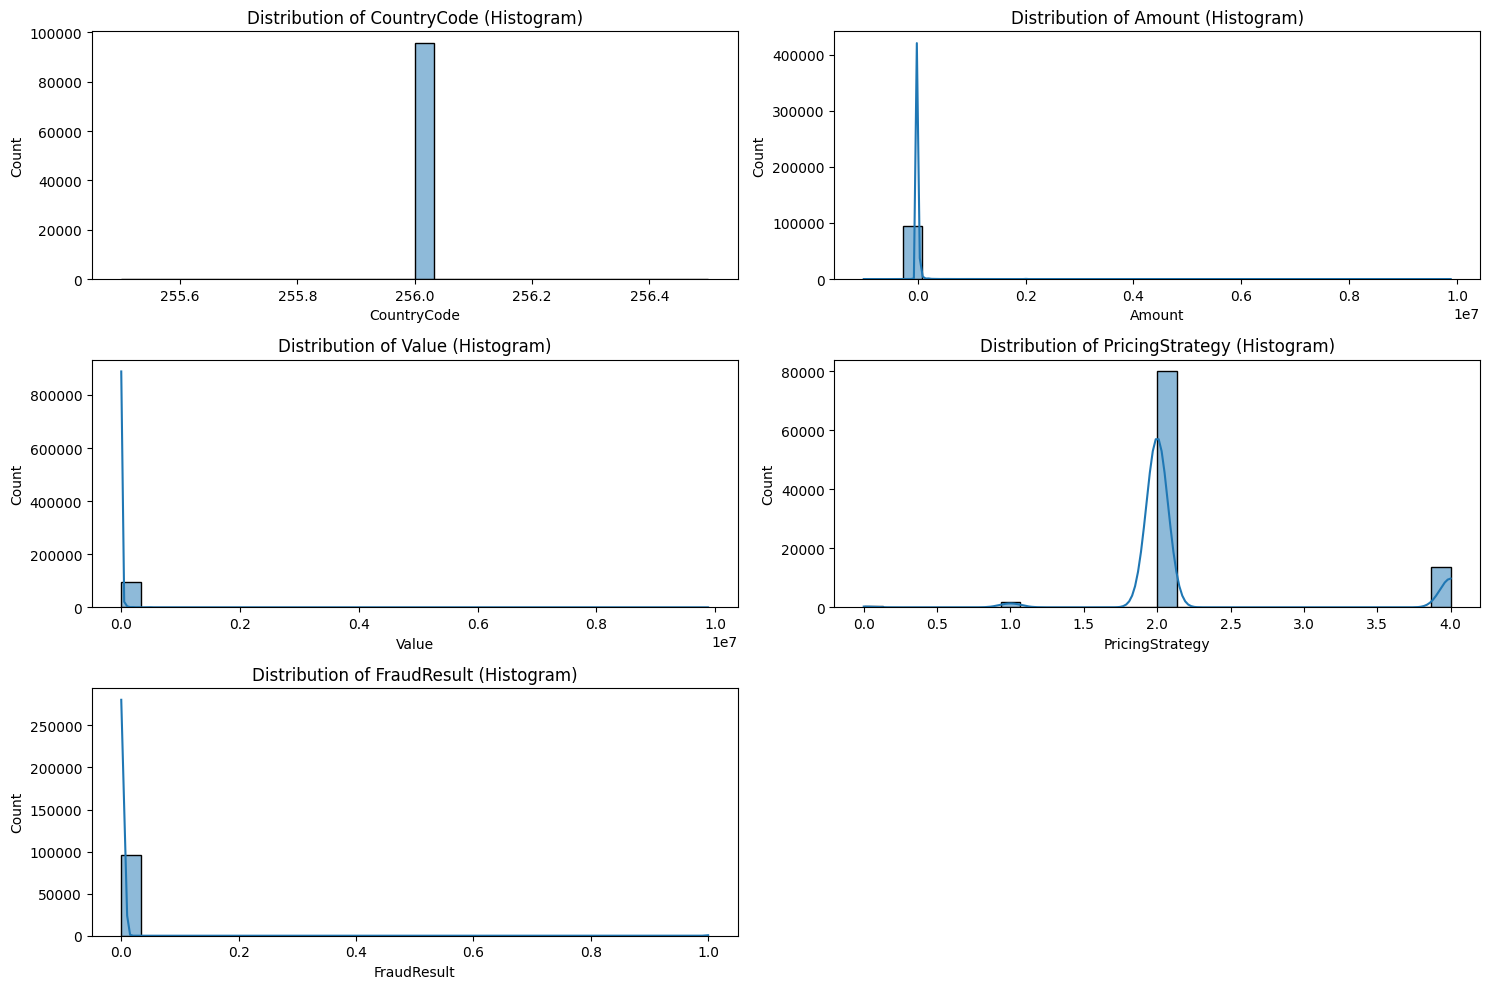

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col} (Histogram)')
plt.tight_layout()
plt.show()

- The dataset contains five numerical columns: CountryCode, Amount, Value, PricingStrategy, and FraudResult.
- CountryCode is a constant value (256) and does not show any variation.
- Amount and Value are highly skewed to the right.
- PricingStrategy appears to be a categorical or ordinal variable represented numerically, with strategy 2 being the most frequent.
- FraudResult is a binary variable with a significant class imbalance, indicating that fraudulent transactions are rare (represented by the value 1).

## Distribution of Categorical Features
Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.

In [10]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


In [11]:
print("The count of unique values in the columns:")
print(df[categorical_cols].nunique())

The count of unique values in the columns:
TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
TransactionStartTime    94556
dtype: int64


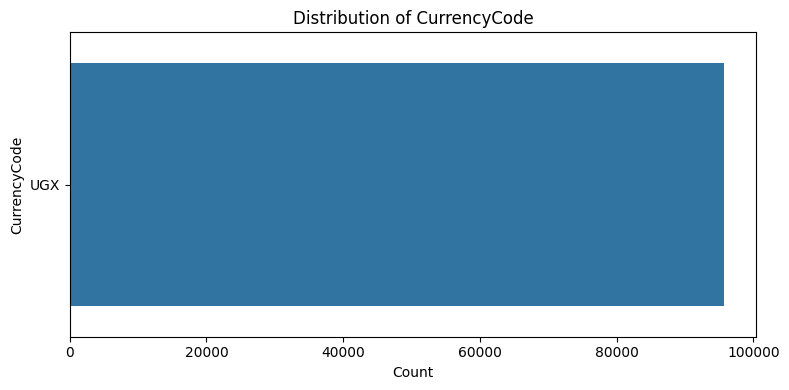

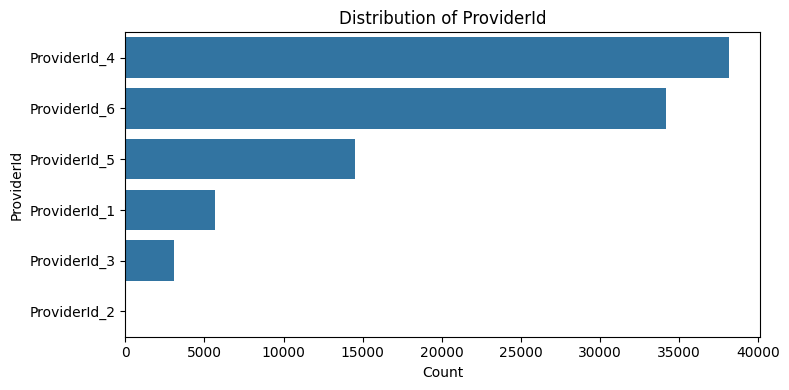

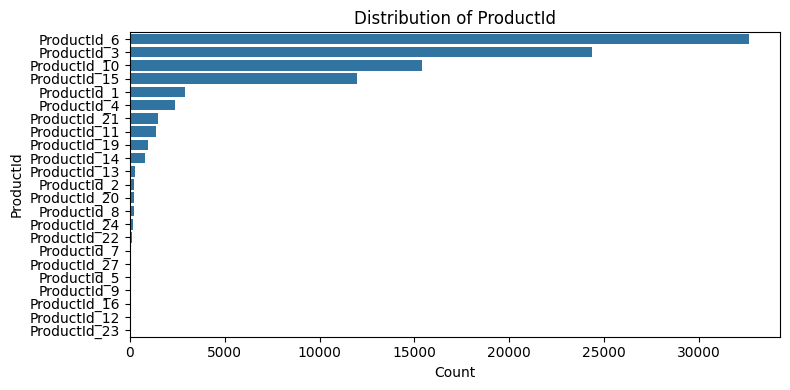

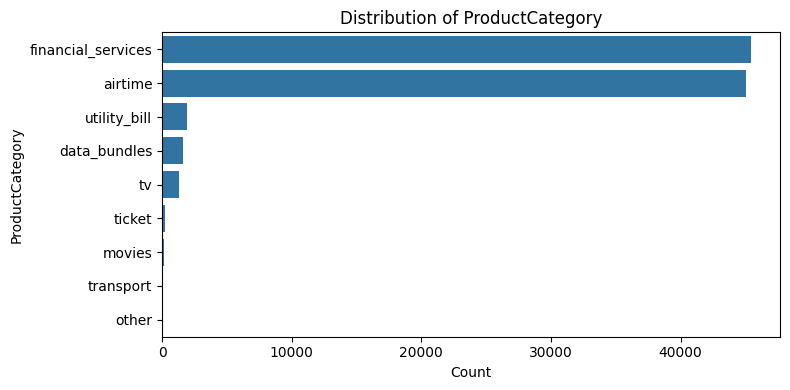

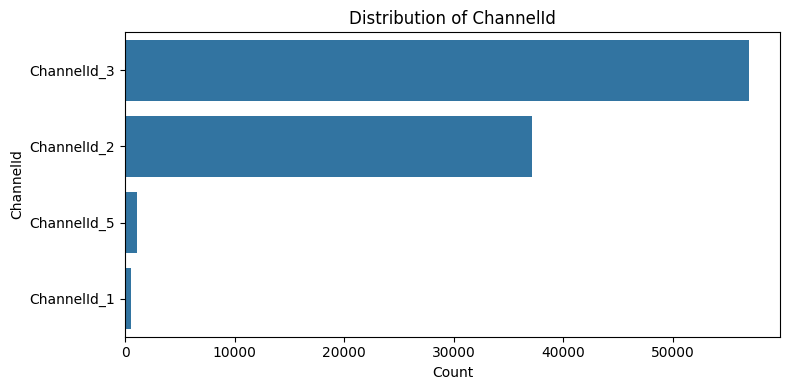

In [12]:
# Exclude columns with a large number of unique values for plotting
cols_to_exclude = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'TransactionStartTime']
categorical_cols_to_plot = [col for col in categorical_cols if col not in cols_to_exclude]

# Plot bar charts for each categorical column
for col in categorical_cols_to_plot:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

- CurrencyCode: All transactions use the same currency code (UGX). 
- ProviderId: few dominant providers (ProviderId_4, ProviderId_6, ProviderId_5) 
- ProductId: ProductId_6, ProductId_3, ProductId_10, ProductId_15 are much more popular than others.
- ProductCategory: 'financial_services' and 'airtime' are the most frequent categories, followed by 'utility_bill', 'data_bundles', and 'tv'.
- ChannelId: 'ChannelId_3' and 'ChannelId_2' are the most used channels.

## Correlation Analysis
Understanding the relationship between numerical features using a correlation matrix and heatmap.

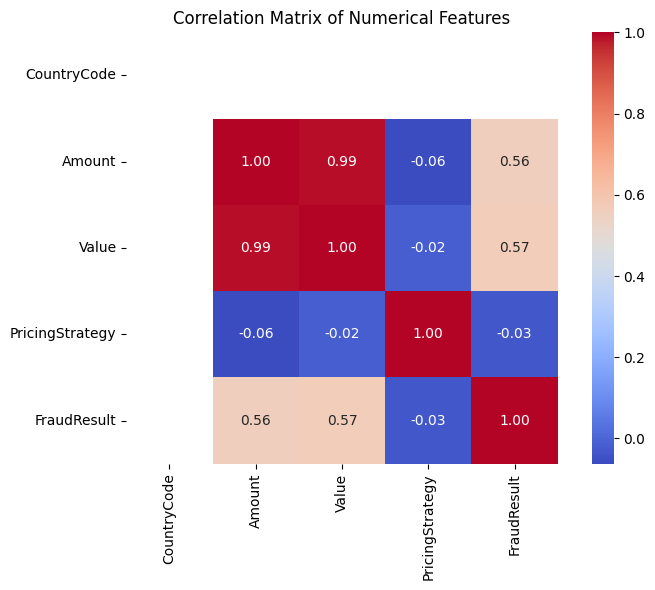

In [13]:
# Compute the correlation matrix for numerical features
corr_matrix = df[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

- There is a very strong positive correlation (0.99) between 'Amount' and 'Value', suggesting they represent similar aspects of a transaction.
- 'Amount' and 'Value' show a moderate positive correlation with 'FraudResult' (0.56 and 0.57, respectively), indicating that fraudulent transactions tend to have higher amounts and values.
- 'PricingStrategy' and 'CountryCode' have very low or no correlation with other numerical features, including 'FraudResult'.

## Identifying Missing Values
Identify missing values to determine missing data and decide on appropriate imputation strategies.

In [14]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print(f"\nMissing values in the dataset:\n{missing_values}")


Missing values in the dataset:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


- Each columns has 0 missing value, so there are no missing value.

## Box Plots of Numerical Features

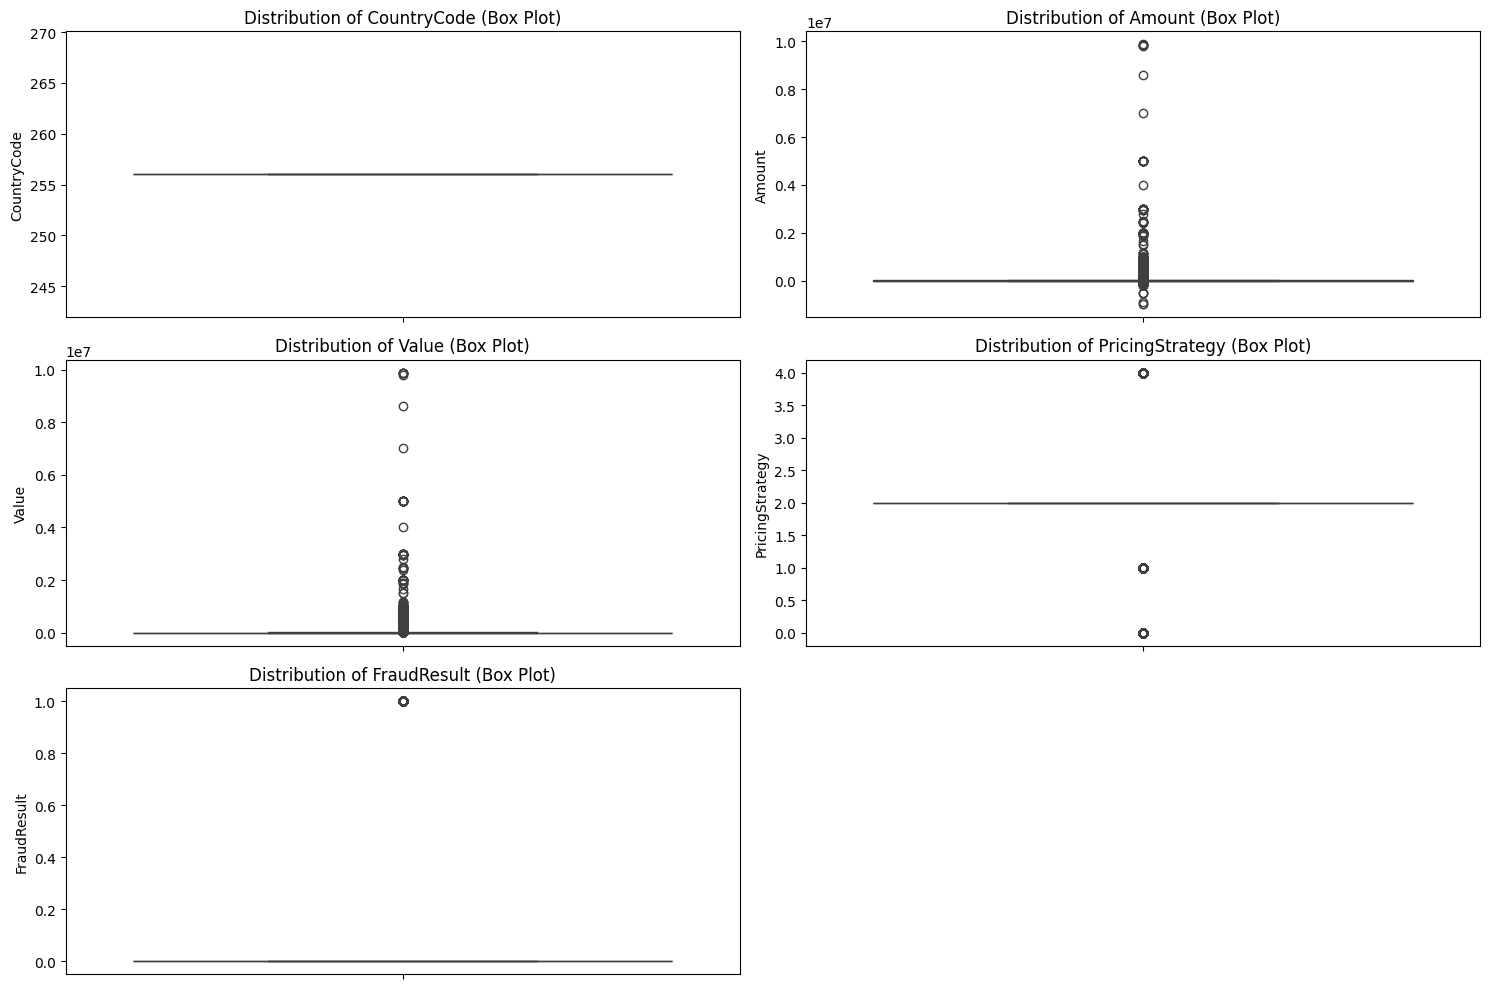

In [15]:
# Plot box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Distribution of {col} (Box Plot)')
plt.tight_layout()
plt.show()

- Amount and Value contain a large number of outliers.

# Summary of Exploratory Data Analysis

- **Data Overview:** The dataset contains 95,662 rows and 16 columns, with 1 float, 4 int, and 11 object datatype columns. No duplicate or missing values were found.
- **Numerical Features:**
  - Five numerical columns: CountryCode, Amount, Value, PricingStrategy, and FraudResult.
  - CountryCode is constant (256) and not informative.
  - Amount and Value are highly skewed to the right and contain many outliers.
  - PricingStrategy is likely categorical/ordinal, with strategy 2 most frequent.
  - FraudResult is a binary variable with significant class imbalance (fraudulent transactions are rare).
- **Categorical Features:**
  - CurrencyCode is constant (UGX).
  - ProviderId, ProductId, ProductCategory, and ChannelId have a few dominant categories.
  - ProductCategory: 'financial_services' and 'airtime' are most frequent.
- **Correlation Analysis:**
  - Amount and Value are very strongly correlated (0.99), suggesting they represent similar transaction aspects.
  - Both show moderate positive correlation with FraudResult, indicating higher values in fraudulent transactions.
  - PricingStrategy and CountryCode have low or no correlation with other features.
- **General Notes:**
  - The dataset is clean, with no missing values.
  - There is a significant class imbalance in the target variable (FraudResult).
  - Some features (CountryCode, CurrencyCode) may be dropped due to lack of variability.